In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv(r"C:\Users\Mounika\Downloads\NetflixOriginals.csv", encoding='unicode_escape')
print(df)

# 2. Clean & parse datetime
df.dropna(subset=['IMDB Score', 'Runtime', 'Premiere', 'Genre', 'Language'])
df['Premiere'] = pd.to_datetime(df['Premiere'], dayfirst=True, errors='coerce')
df['Year'] = df['Premiere'].dt.year
df['Month'] = df['Premiere'].dt.month_name()

# 3. Summary statistics
print("IMDB Score stats:\n", df['IMDB Score'].describe())
print("\nRuntime stats:\n", df['Runtime'].describe())
print("\nGenre counts:", df['Genre'].nunique())
print("\nTop languages:\n", df['Language'].value_counts().head(10))

                                           Title                  Genre  \
0                                Enter the Anime            Documentary   
1                                    Dark Forces               Thriller   
2                                        The App  Science fiction/Drama   
3                                 The Open House        Horror thriller   
4                                    Kaali Khuhi                Mystery   
..                                           ...                    ...   
579        Taylor Swift: Reputation Stadium Tour           Concert Film   
580  Winter on Fire: Ukraine's Fight for Freedom            Documentary   
581                      Springsteen on Broadway           One-man show   
582    Emicida: AmarElo - It's All For Yesterday            Documentary   
583     David Attenborough: A Life on Our Planet            Documentary   

              Premiere  Runtime  IMDB Score                  Language  
0       August 5, 2019     

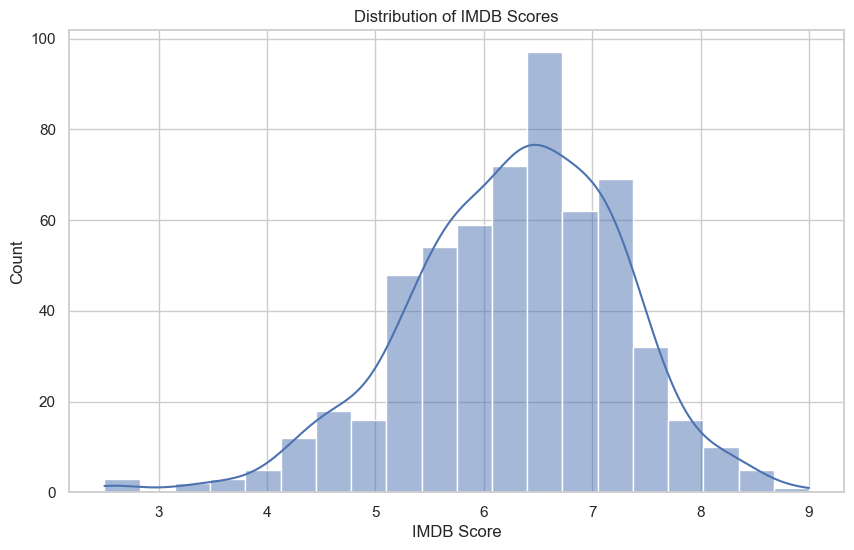

In [3]:
# 4. Visualizations
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.histplot(df['IMDB Score'], bins=20, kde=True)
plt.title("Distribution of IMDB Scores")
plt.xlabel("IMDB Score")
plt.show()

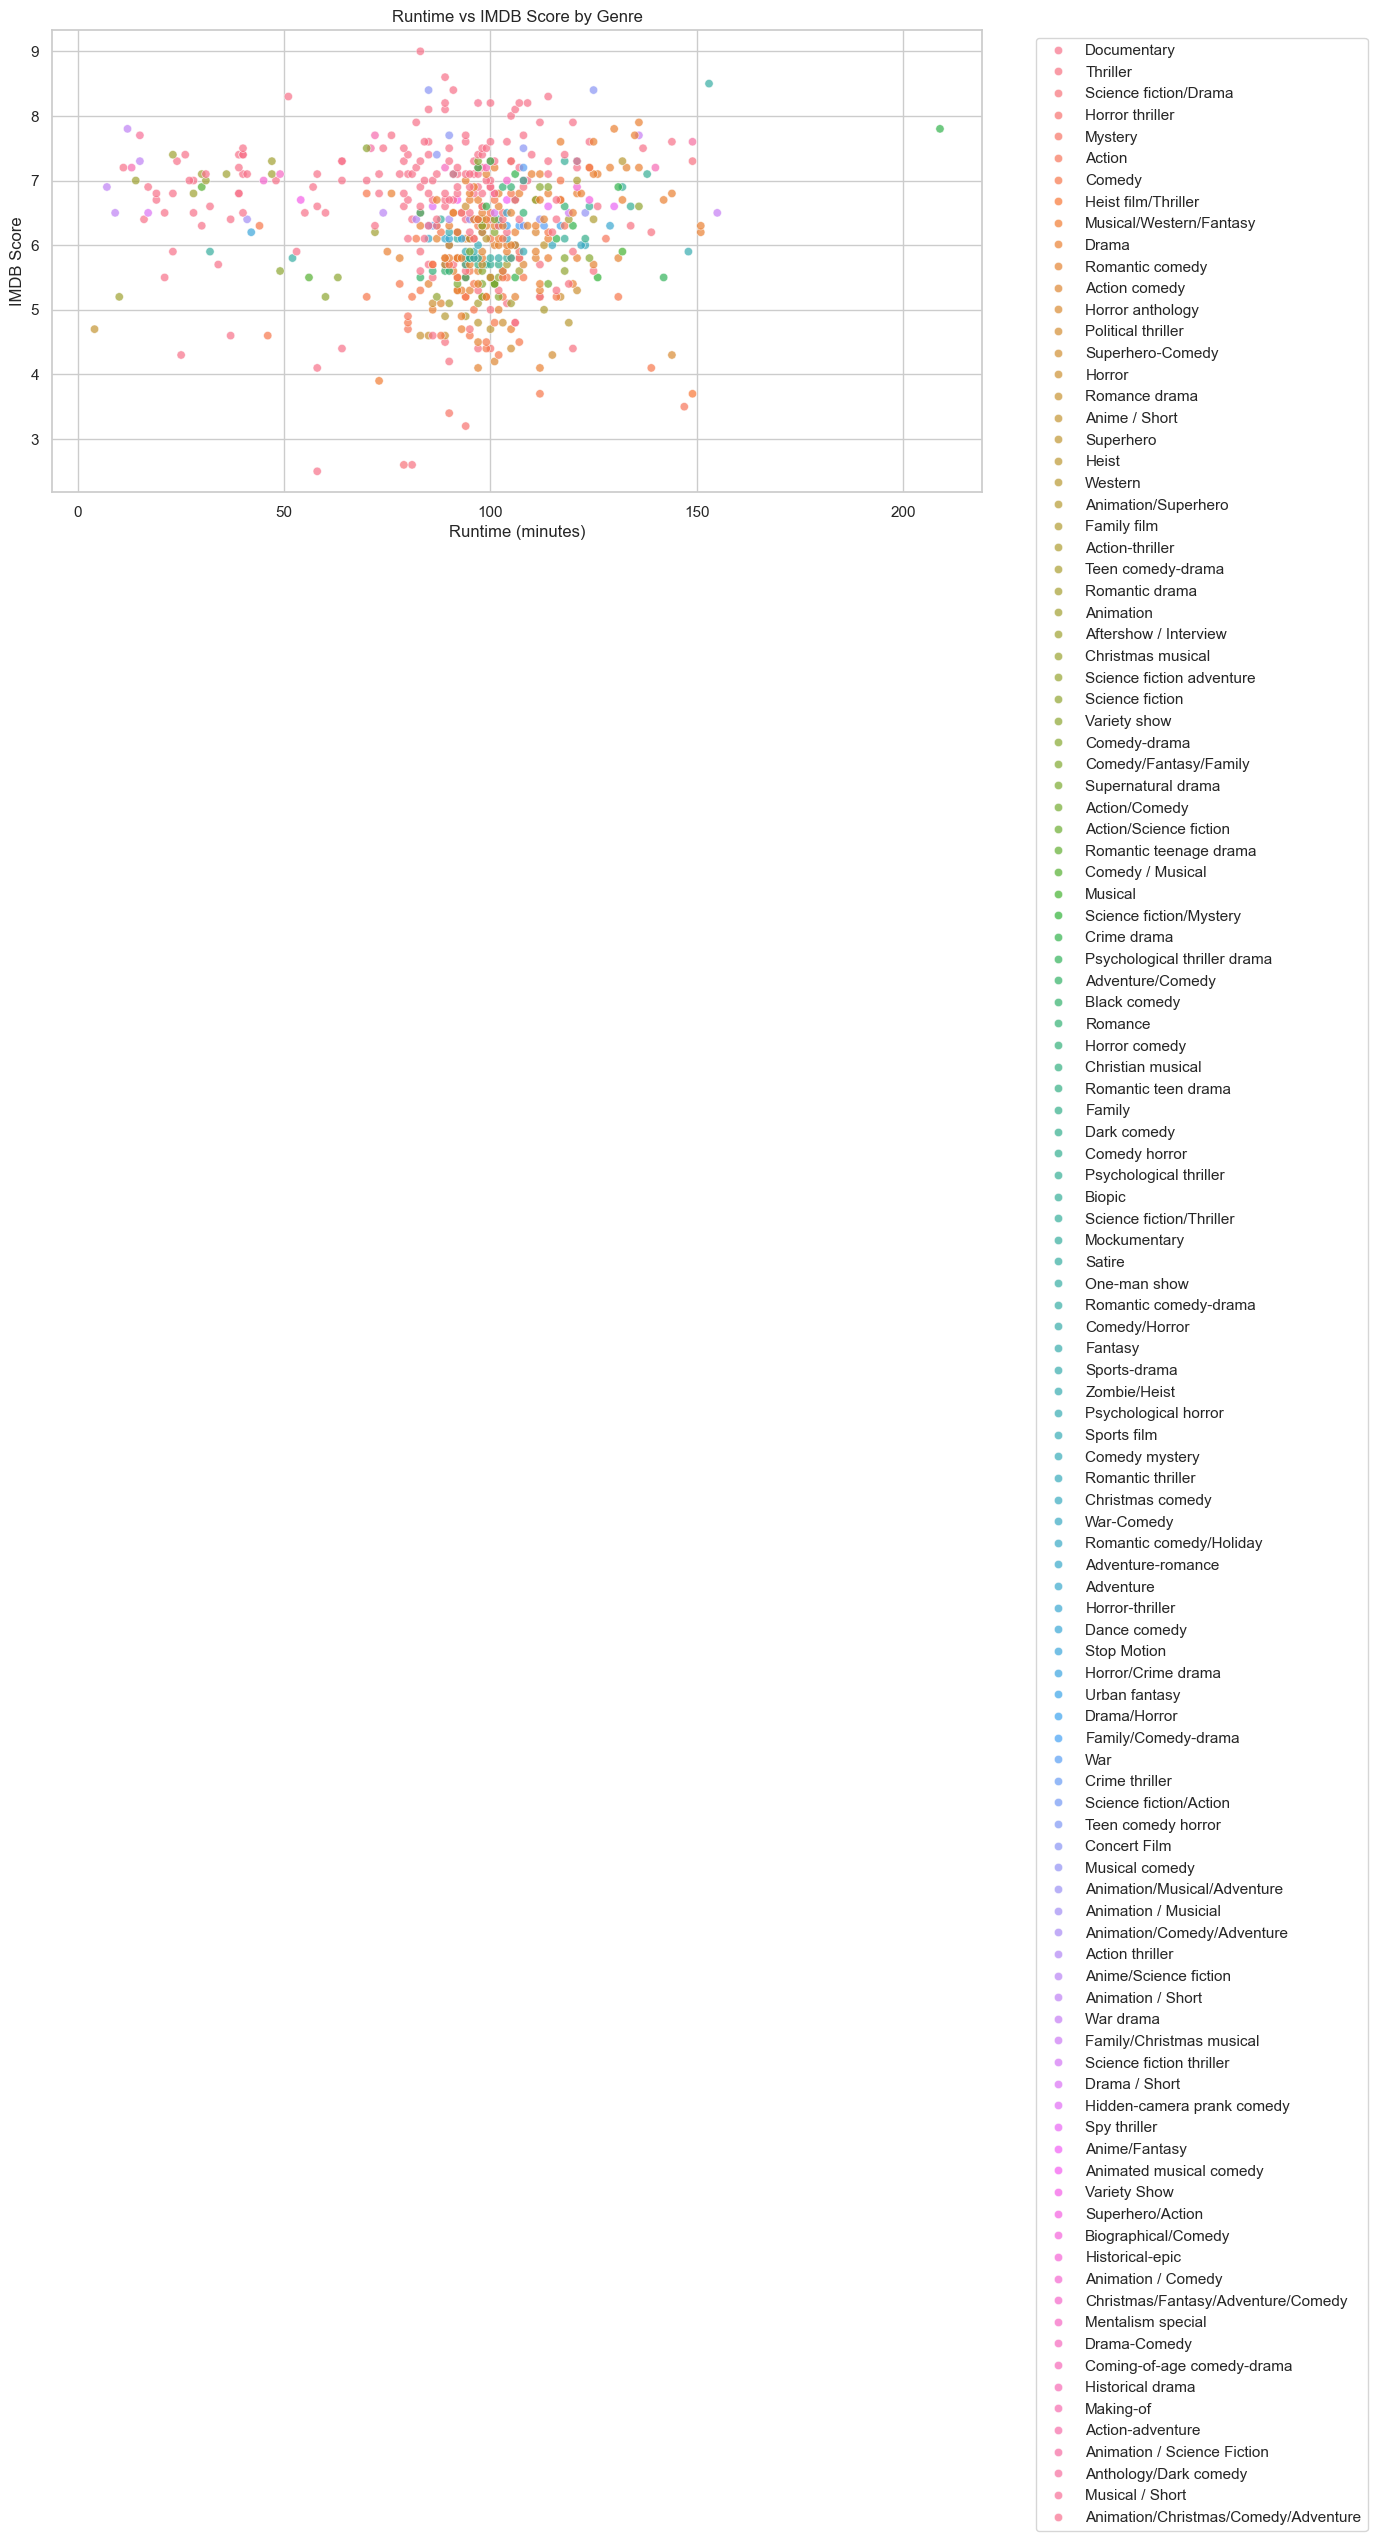

In [4]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Runtime', y='IMDB Score', hue='Genre', alpha=0.7)
plt.title("Runtime vs IMDB Score by Genre")
plt.xlabel("Runtime (minutes)")
plt.ylabel("IMDB Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

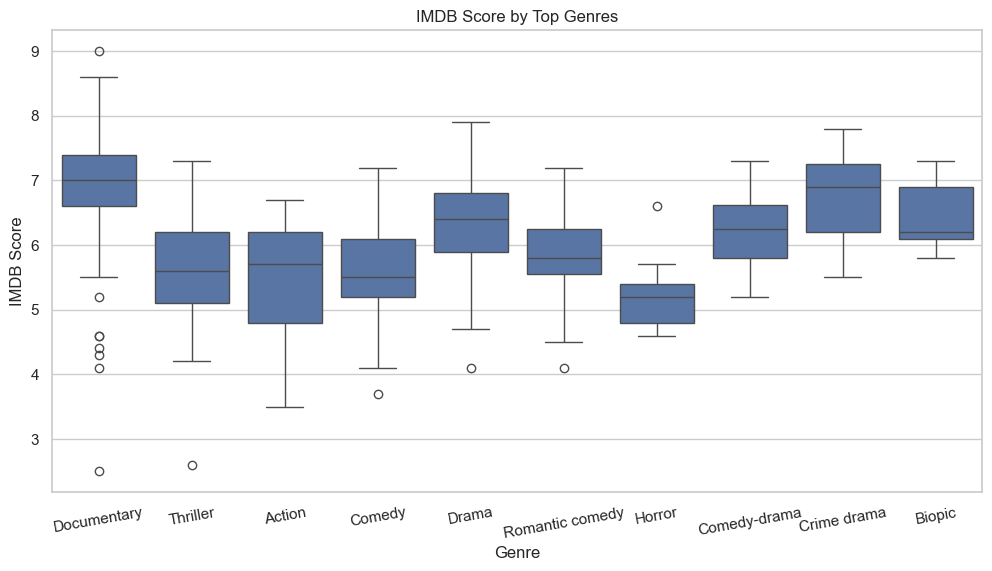

In [8]:
plt.figure(figsize=(12,6))
top_genres = df['Genre'].value_counts().nlargest(10).index
sns.boxplot(data=df[df['Genre'].isin(top_genres)], x='Genre', y='IMDB Score')
plt.xticks(rotation=10)
plt.title("IMDB Score by Top Genres")
plt.show()

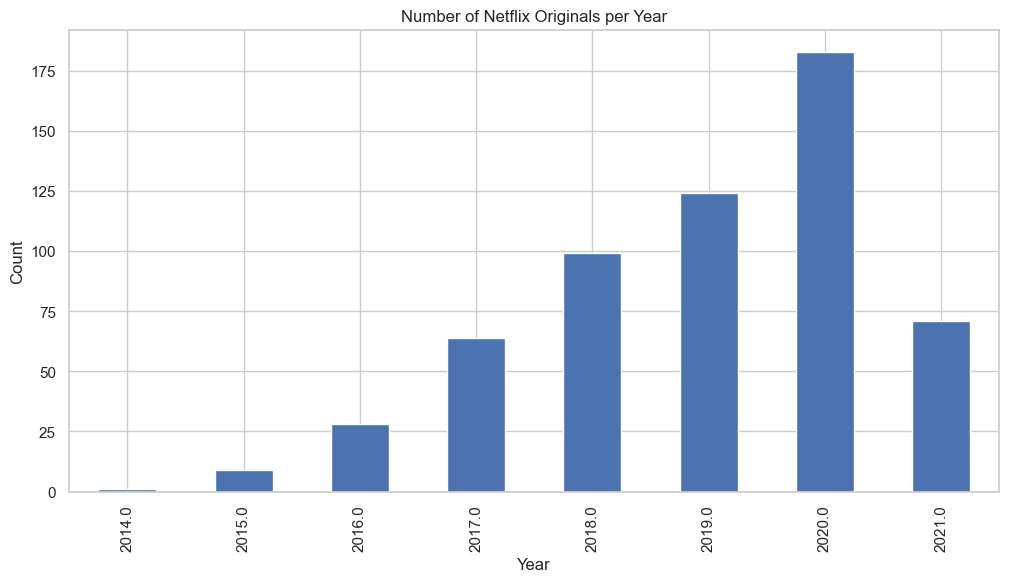

In [6]:
plt.figure(figsize=(12,6))
year_counts = df['Year'].value_counts().sort_index()
year_counts.plot(kind='bar')
plt.title("Number of Netflix Originals per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

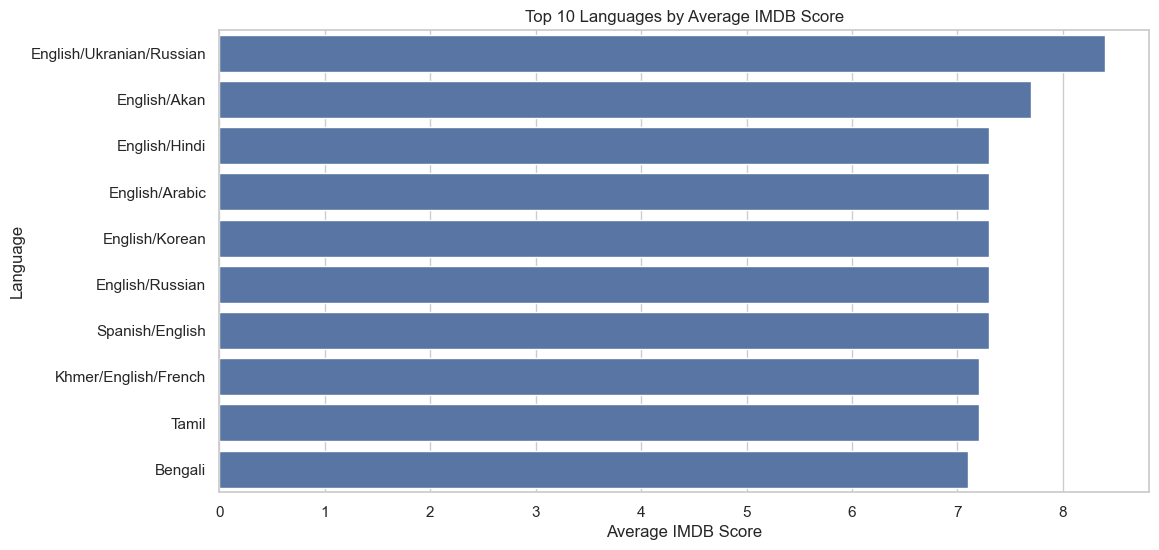


Correlation (Runtime vs IMDb Score): -0.041


In [7]:
plt.figure(figsize=(12,6))
lang_avg = df.groupby('Language')['IMDB Score'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=lang_avg.values, y=lang_avg.index)
plt.title("Top 10 Languages by Average IMDB Score")
plt.xlabel("Average IMDB Score")
plt.ylabel("Language")
plt.show()
# 5. Correlation between runtime and IMDb
corr = df['Runtime'].corr(df['IMDB Score'])
print(f"\nCorrelation (Runtime vs IMDb Score): {corr:.3f}")